In [80]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray
import rasterio

In [81]:
forecast_path = os.path.join("C:\\Data",'forecast')
GFS = os.path.join(forecast_path,"gfs.t06z.pgrb2.0p25.f033")

Ignoring index file 'C:\\Data\\forecast\\gfs.t06z.pgrb2.0p25.f033.923a8.idx' incompatible with GRIB file


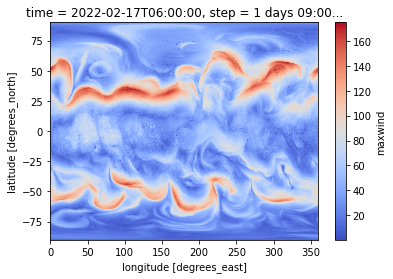

In [82]:
ds = xr.load_dataset(GFS, filter_by_keys={'typeOfLevel': 'maxWind'},engine="cfgrib")
ds['maxwind'] = (np.sqrt(np.square(ds['u'])+np.square(ds['v'])))*1.852
ds.maxwind.plot(cmap=plt.cm.coolwarm)

In [83]:
ds['longitude'] = (ds['longitude'] + 180) % 360 - 180

In [84]:
min_lon = 3
min_lat = 50
max_lon = 8
max_lat = 54

mask_lon = (ds.longitude >= min_lon) & (ds.longitude <= max_lon)
mask_lat = (ds.latitude >= min_lat) & (ds.latitude <= max_lat)

cropped_ds = ds.where(mask_lon & mask_lat, drop=True)

width = len(cropped_ds.longitude)
height = len(cropped_ds.latitude)

In [85]:
cropped_ds['maxwind'].rio.to_raster(os.path.join(forecast_path,'GeoTIFF',"f033_NL.tif"),crs="epsg:4326")

In [88]:
with rasterio.open(os.path.join(forecast_path,'GeoTIFF',"f033_NL.tif")) as src:
    affine = rasterio.transform.from_bounds(min_lon, min_lat, max_lon, max_lat, width, height)
    array = src.read(1)
    
with rasterio.open(
    os.path.join(forecast_path,'GeoTIFF',"f033_NL.tif"),    'w',    driver='GTiff',    height=array.shape[0],    width=array.shape[1],    count=1,
    dtype=array.dtype,nodata=9999,
    crs='epsg:4326',  transform=affine) as dst:
    dst.write(array, 1)    

CPLE_AppDefinedError: Deleting C:/Data/forecast/GeoTIFF/f033_NL.tif failed: Permission denied